In [26]:
import  cv2
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img,img_to_array

# creating the CNN model Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator 

In [2]:
b_path="vehicle_classification_data_200//vehicle_classification_data_200//"
classes = ["2w","bus","car"]

In [3]:
for expression in os.listdir(b_path):
    print(str(len(os.listdir(b_path+ expression)))+" "+expression+" images")

1815 2w images
1933 bus images
2239 car images


(67, 25, 3)


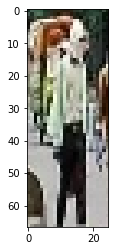

In [19]:
im = cv2.imread("vehicle_classification_data_200/vehicle_classification_data_200/2w/1594112597.2941852.jpg.jpg")
print(im.shape)
plt.imshow(im)


In [5]:
# train_dir, val_dir = keras.utils.data_utils.train_valid_split(b_path, validation_split=0.1)
# # all data in train_dir which are alias to original_data.
# # and train_dir is a temporary directory.

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

# val_generator = val_datagen.flow_from_directory(
#        val_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

In [20]:
datagen = ImageDataGenerator(validation_split=0.2)
t = datagen.flow_from_directory(
    b_path,
    batch_size = 128,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    subset='training',
    shuffle=True
    )

v = datagen.flow_from_directory(
    b_path,
    batch_size = 128,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    subset='validation'
    )

Found 4791 images belonging to 3 classes.
Found 1196 images belonging to 3 classes.


In [21]:
type(t)

keras.preprocessing.image.DirectoryIterator

In [22]:
print(t.samples)
print(t.class_indices)

4791
{'2w': 0, 'bus': 1, 'car': 2}


In [23]:
t.filenames[0]

'2w\\1606908143.0885713.jpg.jpg'

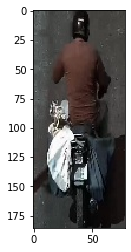

In [24]:
q=cv2.imread(b_path+t.filenames[0])
plt.imshow(q)


In [16]:
# #Defining sequential  model

# n_classes = 3
# model = Sequential()
# model.add(Conv2D(64,(3,3)))

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
opt=RMSprop(lr=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16928)            

In [32]:
#training model
epochs = 10
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("vehicle_model.h5",monitor = "val_acc",verbose=1,
                             save_best_only=True,mode = "max")
callbacks_list = [checkpoint]
history = model.fit_generator(generator=t,steps_per_epoch=t.n//t.batch_size
                              ,epochs=epochs,validation_data = v,validation_steps=v.n//v.batch_size,
                             callbacks = callbacks_list)


Epoch 1/10
37/37 [==============================] - 50s 1s/step - loss: 11.1862 - accuracy: 0.5962 - val_loss: 1.1182 - val_accuracy: 0.6484
Epoch 2/10


C:\Users\rishabh\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


37/37 [==============================] - 24s 637ms/step - loss: 0.9629 - accuracy: 0.7281 - val_loss: 0.3846 - val_accuracy: 0.8099
Epoch 3/10
37/37 [==============================] - 22s 603ms/step - loss: 0.5857 - accuracy: 0.7823 - val_loss: 0.3117 - val_accuracy: 0.8652
Epoch 4/10
37/37 [==============================] - 21s 576ms/step - loss: 0.5201 - accuracy: 0.8214 - val_loss: 0.4180 - val_accuracy: 0.8333
Epoch 5/10
37/37 [==============================] - 21s 568ms/step - loss: 0.3943 - accuracy: 0.8610 - val_loss: 0.2324 - val_accuracy: 0.9204
Epoch 6/10
37/37 [==============================] - 21s 567ms/step - loss: 0.3117 - accuracy: 0.8925 - val_loss: 0.4525 - val_accuracy: 0.8399
Epoch 7/10
37/37 [==============================] - 20s 553ms/step - loss: 0.2291 - accuracy: 0.9168 - val_loss: 0.2972 - val_accuracy: 0.9092
Epoch 8/10
37/37 [==============================] - 20s 544ms/step - loss: 0.1838 - accuracy: 0.9314 - val_loss: 0.1979 - val_accuracy: 0.9223
Epoch 9/10

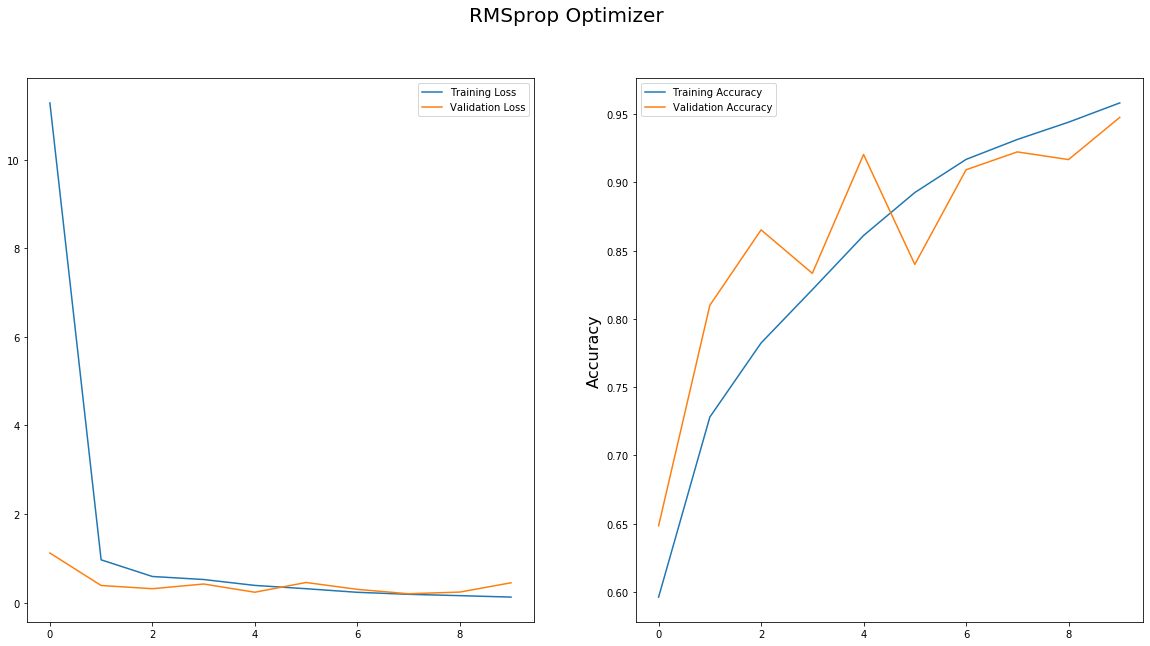

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('RMSprop Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()

In [34]:
history.history["accuracy"]

[0.5961827,
 0.72807205,
 0.78232896,
 0.82135963,
 0.8610337,
 0.8925253,
 0.9167756,
 0.93137467,
 0.9440456,
 0.95816994]

In [35]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")